# Objective and Summary

## Objective
The main goal of this project is to analyze and classify customer segments based on their demographic and behavioral attributes. By building and evaluating multiple machine learning models, we aim to predict the segmentation of new customers effectively.

## Summary
1. **Data Exploration and Preprocessing**:
   - Explored the dataset to understand its structure and clean missing or inconsistent values.
   - Encoded categorical features and scaled numerical ones where necessary.
   - Checked for class imbalance in the segmentation categories.

2. **Feature Engineering**:
   - Selected the most important features using Recursive Feature Elimination (RFE).
   - Tested multiple combinations of features to improve model performance.

3. **Model Development**:
   - Experimented with various classification models, including Logistic Regression, SVM, Decision Tree, Random Forest, and Gradient Boosting Classifier.
   - Performed hyperparameter tuning using GridSearchCV to optimize the Gradient Boosting Classifier.

4. **Evaluation**:
   - Evaluated models using cross-validation and metrics like accuracy, precision, recall, F1-score, and ROC-AUC.
   - Gradient Boosting Classifier was selected as the final model based on its consistent performance.

5. **Outcome**:
   - The final Gradient Boosting Classifier achieved reliable predictions with optimized hyperparameters.
   - Insights into feature importance helped understand key drivers of customer segmentation.

6. **Next Steps**:
   - Deploy the model for real-world applications.
   - Continuously monitor and improve performance with new data.


In [94]:
# Importing the libraries
import pandas as pd 
import numpy as np

In [95]:
data = pd.read_csv("Train.csv")
data.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


# EDA

cleaning data

In [96]:
data.shape

(8068, 11)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [98]:
data.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [99]:
data["Work_Experience"].value_counts()

Work_Experience
1.0     2354
0.0     2318
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: count, dtype: int64

In [100]:
data[data["Work_Experience"].isna()]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
13,459573,Male,Yes,70,No,Lawyer,NaN,Low,1.0,Cat_6,A
39,467442,Male,Yes,56,Yes,Artist,NaN,Average,2.0,Cat_6,C
45,463156,Female,Yes,79,No,Lawyer,NaN,High,2.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8020,465278,Male,Yes,38,No,Marketing,NaN,High,4.0,Cat_7,C
8029,462516,Female,No,28,No,Engineer,NaN,Low,3.0,Cat_6,D
8040,467165,Female,No,25,No,Homemaker,NaN,Low,1.0,Cat_6,D
8047,462396,Male,Yes,50,Yes,Doctor,NaN,Average,2.0,Cat_6,C


In [101]:
# Step 1: Calculate mean age for rows with NaN in Work_Experience
mean_age_nan = data[data['Work_Experience'].isna()]['Age'].mean()

# Step 2: Filter rows close to the mean age (e.g., within ±5 years)
age_range = 5
filtered_df = data[(data['Age'] >= mean_age_nan - age_range) & 
                 (data['Age'] <= mean_age_nan + age_range) & 
                 (data['Work_Experience'].notna())]

# Step 3: Calculate mean work experience for the filtered group
mean_work_experience = filtered_df['Work_Experience'].median()

# Step 4: Fill NaN values with the calculated mean
data['Work_Experience'] = data['Work_Experience'].fillna(mean_work_experience)

In [102]:
data.dropna(subset=['Ever_Married','Profession'],inplace=True)

In [103]:
data.isna().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated           67
Profession           0
Work_Experience      0
Spending_Score       0
Family_Size        313
Var_1               72
Segmentation         0
dtype: int64

In [104]:
# Step 1: Create Age Ranges (Optional for more granularity)
data['Age_Range'] = pd.cut(data['Age'], bins=[10,20, 30, 40, 50,60,70,80,90], labels=['10-20','20-30', '30-40', '40-50','50-60','60-70','70-80','80-90'])

# Step 2: Group by Marital_Status and Age_Range and calculate mean family size
group_means = data.groupby(['Ever_Married', 'Age_Range'])['Family_Size'].median()

# Step 3: Define a function to fill missing values
def fill_family_size(row):
    if pd.isna(row['Family_Size']):
        return group_means.get((row['Ever_Married'], row['Age_Range']), np.nan)
    return row['Family_Size']

# Step 4: Apply the function to fill NaN values
data['Family_Size'] = data.apply(fill_family_size, axis=1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17724\590740114.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = data.groupby(['Ever_Married', 'Age_Range'])['Family_Size'].median()


In [105]:
data["Age_Range"].value_counts()

Age_Range
30-40    1949
40-50    1595
20-30    1582
50-60    1008
60-70     643
10-20     373
70-80     366
80-90     292
Name: count, dtype: int64

In [106]:
data.isna().sum()

ID                  0
Gender              0
Ever_Married        0
Age                 0
Graduated          67
Profession          0
Work_Experience     0
Spending_Score      0
Family_Size         0
Var_1              72
Segmentation        0
Age_Range           0
dtype: int64

In [107]:
data[data['Graduated'].isna()]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Range
57,462267,Male,No,32,NaN,Doctor,8.0,Low,2.0,Cat_6,D,30-40
220,464613,Female,No,35,NaN,Artist,0.0,Low,3.0,Cat_6,B,30-40
290,465058,Female,No,43,NaN,Entertainment,1.0,Low,1.0,Cat_6,B,40-50
431,462548,Male,No,18,NaN,Executive,1.0,Low,5.0,Cat_4,A,10-20
510,460685,Male,No,51,NaN,Artist,6.0,Low,4.0,Cat_4,B,50-60
...,...,...,...,...,...,...,...,...,...,...,...,...
7581,461614,Female,No,25,NaN,Healthcare,1.0,Low,1.0,Cat_4,C,20-30
7602,466506,Male,Yes,50,NaN,Artist,1.0,Average,4.0,Cat_6,A,40-50
7829,460567,Male,No,39,NaN,Entertainment,8.0,Low,4.0,Cat_3,C,30-40
7987,462933,Male,Yes,55,NaN,Entertainment,1.0,High,5.0,Cat_6,B,50-60


In [108]:
group_modes = data.groupby(['Profession', 'Age_Range'])['Graduated'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Define a function to fill missing values
def fill_graduate(row):
    if pd.isna(row['Graduated']):
        return group_modes.get((row['Profession'], row['Age_Range']), np.nan)
    return row['Graduated']

# Apply the function to fill NaN values
data['Graduated'] = data.apply(fill_graduate, axis=1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17724\2135024983.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_modes = data.groupby(['Profession', 'Age_Range'])['Graduated'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)


In [109]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoders
label_encoders = {}

# Encode categorical columns
categorical_columns = ['Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation', 'Gender']
for column in categorical_columns:
    le = LabelEncoder()
    data[f"{column}_int"] = le.fit_transform(data[column])
    label_encoders[column] = le  # Save encoder for later use


In [110]:
data.dropna(inplace=True)

In [111]:
data.isna().sum()

ID                    0
Gender                0
Ever_Married          0
Age                   0
Graduated             0
Profession            0
Work_Experience       0
Spending_Score        0
Family_Size           0
Var_1                 0
Segmentation          0
Age_Range             0
Ever_Married_int      0
Graduated_int         0
Profession_int        0
Spending_Score_int    0
Var_1_int             0
Segmentation_int      0
Gender_int            0
dtype: int64

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7736 entries, 0 to 8067
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  7736 non-null   int64   
 1   Gender              7736 non-null   object  
 2   Ever_Married        7736 non-null   object  
 3   Age                 7736 non-null   int64   
 4   Graduated           7736 non-null   object  
 5   Profession          7736 non-null   object  
 6   Work_Experience     7736 non-null   float64 
 7   Spending_Score      7736 non-null   object  
 8   Family_Size         7736 non-null   float64 
 9   Var_1               7736 non-null   object  
 10  Segmentation        7736 non-null   object  
 11  Age_Range           7736 non-null   category
 12  Ever_Married_int    7736 non-null   int32   
 13  Graduated_int       7736 non-null   int32   
 14  Profession_int      7736 non-null   int32   
 15  Spending_Score_int  7736 non-null   int32  

In [113]:
data.duplicated().any()

False

In [114]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Range,Ever_Married_int,Graduated_int,Profession_int,Spending_Score_int,Var_1_int,Segmentation_int,Gender_int
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,20-30,0,0,5,2,3,3,1
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A,30-40,1,1,2,0,3,0,0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,60-70,1,1,2,2,5,1,0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,60-70,1,1,7,1,5,1,1
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A,30-40,1,1,3,1,5,0,0


<h2>Analyst and Visualization</h2>

+ What is the distribution of Gender and Age in the dataset?

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns 

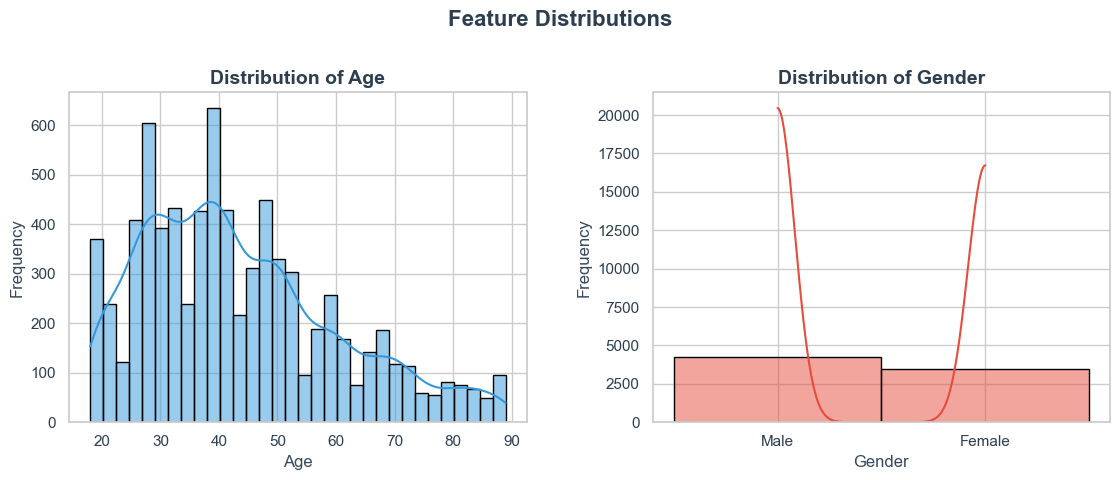

In [116]:
features = ['Age','Gender']

# Set the Seaborn style
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=100) 

# Define custom colors for the plots
colors = ['#3498db', '#e74c3c']

# Plot each feature on a separate subplot
for i, feature in enumerate(features):
    sns.histplot(data[feature], kde=True, ax=axes[i], color=colors[i], edgecolor="black", linewidth=1)
    axes[i].set_title(f'Distribution of {feature}', fontsize=14, fontweight='bold', color="#2c3e50")
    axes[i].set_xlabel(feature, fontsize=12, color="#34495e")
    axes[i].set_ylabel("Frequency", fontsize=12, color="#34495e")
    axes[i].tick_params(axis='both', colors="#2c3e50")

# Adjust layout for aesthetics
plt.tight_layout(pad=3)
fig.suptitle("Feature Distributions", fontsize=16, fontweight='bold', color="#2c3e50", y=1.02)

# Show the plots
plt.show()

+ Are there differences in Family_Size across Gender?

In [117]:
data.groupby("Gender")["Family_Size"].mean()

Gender
Female    2.746552
Male      2.914474
Name: Family_Size, dtype: float64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17724\122458427.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="Family_Size", data=data, palette="Set2")


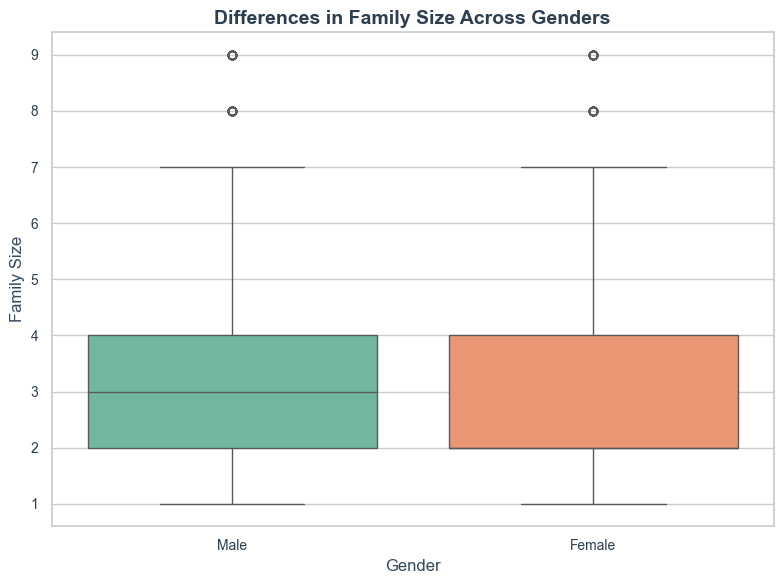

In [118]:
# Boxplot to show the differences in Family_Size across Gender
plt.figure(figsize=(8, 6), dpi=100)
sns.set_theme(style="whitegrid")

sns.boxplot(x="Gender", y="Family_Size", data=data, palette="Set2")
plt.title('Differences in Family Size Across Genders', fontsize=14, fontweight='bold', color="#2c3e50")
plt.xlabel('Gender', fontsize=12, color="#34495e")
plt.ylabel('Family Size', fontsize=12, color="#34495e")
plt.xticks(fontsize=10, color="#2c3e50")
plt.yticks(fontsize=10, color="#2c3e50")

plt.tight_layout()
plt.show()

<p>There seem to be no different in family size between gender.</p>

+ How does the Spending_Score vary across different Segmentation categories?

In [119]:
data.groupby("Segmentation")["Spending_Score"].value_counts().unstack()

Spending_Score,Average,High,Low
Segmentation,,,
A,317,258,1312
B,564,371,859
C,879,400,630
D,128,130,1888


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17724\471121229.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Segmentation", y="Spending_Score", data=data, palette="Set2")


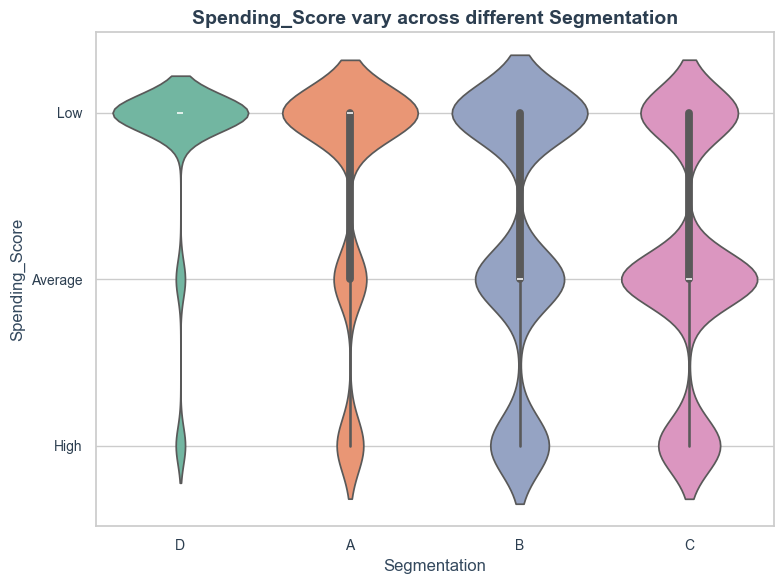

In [120]:
# Boxplot to show the differences in Family_Size across Gender
plt.figure(figsize=(8, 6), dpi=100)
sns.set_theme(style="whitegrid")

sns.violinplot(x="Segmentation", y="Spending_Score", data=data, palette="Set2")
plt.title('Spending_Score vary across different Segmentation', fontsize=14, fontweight='bold', color="#2c3e50")
plt.xlabel('Segmentation', fontsize=12, color="#34495e")
plt.ylabel('Spending_Score', fontsize=12, color="#34495e")
plt.xticks(fontsize=10, color="#2c3e50")
plt.yticks(fontsize=10, color="#2c3e50")

plt.tight_layout()
plt.show()

+ How does the Spending_Score vary across different age?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17724\1014206760.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(y="Age", x="Spending_Score", data=data, palette="Set2")


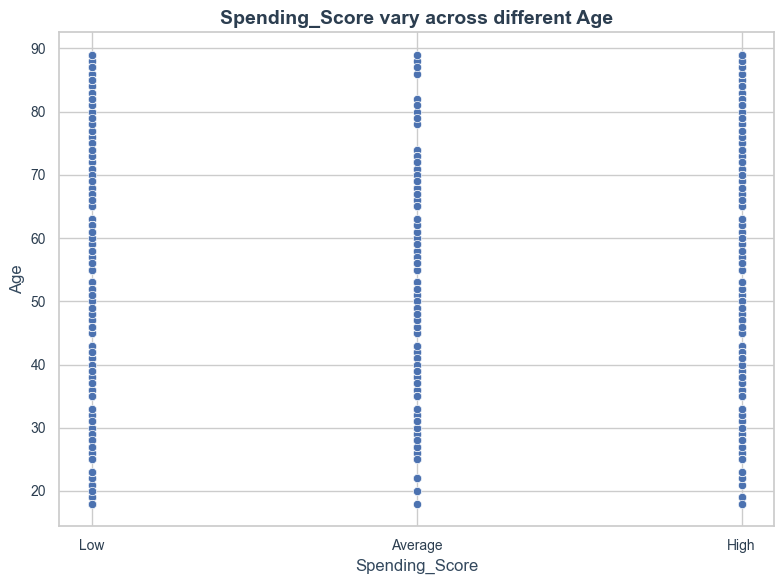

In [121]:
# Boxplot to show the differences in Family_Size across Gender
plt.figure(figsize=(8, 6), dpi=100)
sns.set_theme(style="whitegrid")

sns.scatterplot(y="Age", x="Spending_Score", data=data, palette="Set2")
plt.title('Spending_Score vary across different Age', fontsize=14, fontweight='bold', color="#2c3e50")
plt.ylabel('Age', fontsize=12, color="#34495e")
plt.xlabel('Spending_Score', fontsize=12, color="#34495e")
plt.xticks(fontsize=10, color="#2c3e50")
plt.yticks(fontsize=10, color="#2c3e50")

plt.tight_layout()
plt.show()

<P>The spending score and the age seem to be similar to each other nothing trend is observed</P>

+ What are the most common Professions among different Segmentation groups?

In [122]:
data.groupby("Segmentation")["Profession"].value_counts().unstack()

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Segmentation,,,,,,,,,
A,549,192,250,357,119,105,69,191,55
B,736,141,182,218,177,99,53,158,30
C,1043,138,73,147,175,135,28,137,33
D,135,201,172,209,111,944,86,123,165


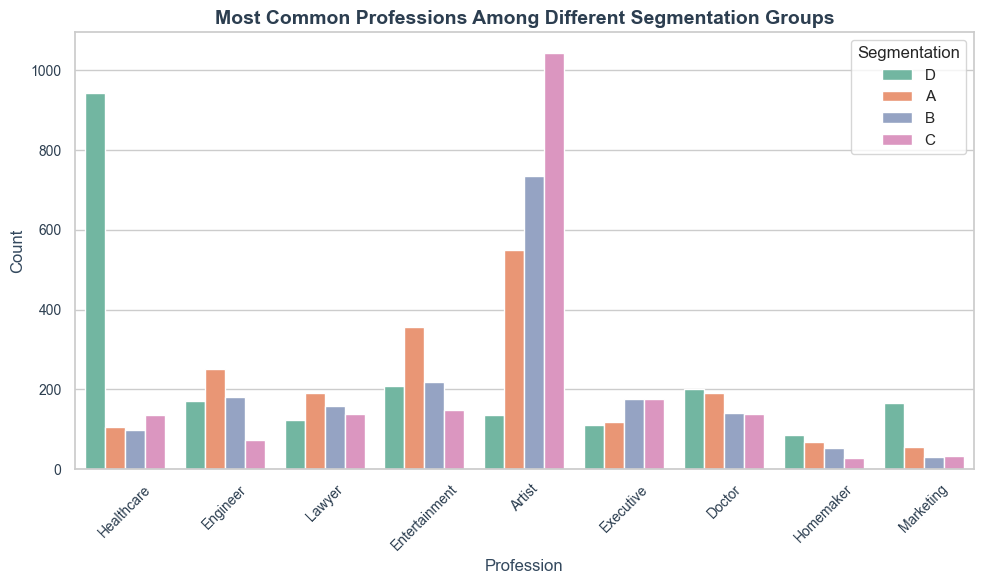

In [123]:

# Example plot for most common professions across segmentation groups
plt.figure(figsize=(10, 6), dpi=100)
sns.set_theme(style="whitegrid")

# Countplot: x = Profession, hue = Segmentation group
sns.countplot(data=data, x='Profession', hue='Segmentation', palette="Set2")

plt.title('Most Common Professions Among Different Segmentation Groups', fontsize=14, fontweight='bold', color="#2c3e50")
plt.ylabel('Count', fontsize=12, color="#34495e")
plt.xlabel('Profession', fontsize=12, color="#34495e")
plt.xticks(rotation=45, fontsize=10, color="#2c3e50")
plt.yticks(fontsize=10, color="#2c3e50")

plt.tight_layout()
plt.show()


<P> The most common profession among the different segmentation groups are: Artist one the segment D is Healthcare</P>

+ Does being Graduated impact the Spending_Score or Segmentation?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17724\1407403406.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Graduated', y='Spending_Score', palette="Set2")


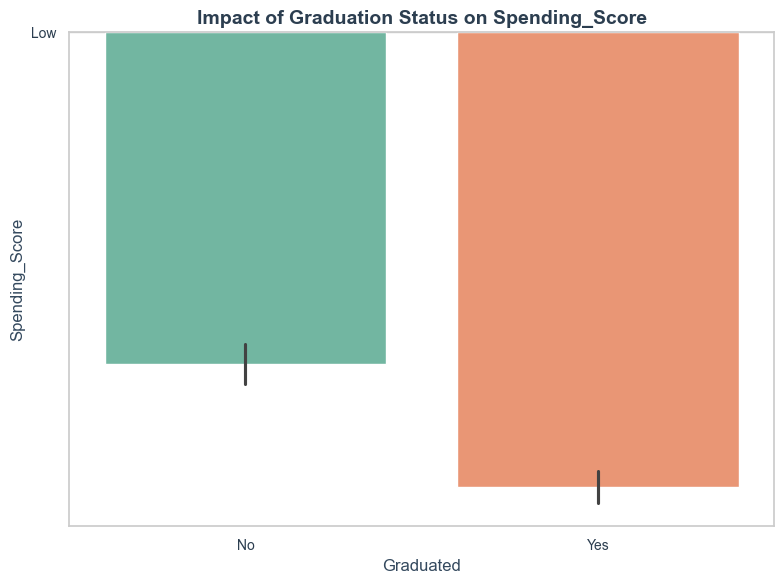

In [124]:

# Boxplot: Comparing Spending_Score based on Graduation Status
plt.figure(figsize=(8, 6), dpi=100)
sns.set_theme(style="whitegrid")

sns.barplot(data=data, x='Graduated', y='Spending_Score', palette="Set2")
plt.title('Impact of Graduation Status on Spending_Score', fontsize=14, fontweight='bold', color="#2c3e50")
plt.ylabel('Spending_Score', fontsize=12, color="#34495e")
plt.xlabel('Graduated', fontsize=12, color="#34495e")
plt.xticks(fontsize=10, color="#2c3e50")
plt.yticks(fontsize=10, color="#2c3e50")

plt.tight_layout()
plt.show()


<p>being graduate seem to be have a higher impact on spending score</p>

+ Are there differences in Segmentation based on Ever_Married status?

In [125]:
data.groupby("Segmentation")["Ever_Married"].value_counts().unstack()

Ever_Married,No,Yes
Segmentation,,
A,784,1103
B,472,1322
C,385,1524
D,1565,581


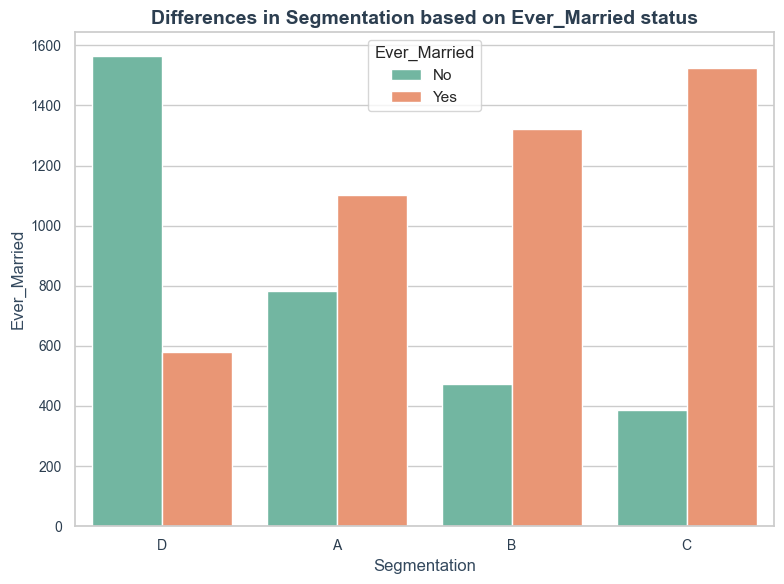

In [126]:

plt.figure(figsize=(8, 6), dpi=100)
sns.set_theme(style="whitegrid")

sns.countplot(data=data, x='Segmentation', hue='Ever_Married', palette="Set2")
plt.title('Differences in Segmentation based on Ever_Married status', fontsize=14, fontweight='bold', color="#2c3e50")
plt.ylabel('Ever_Married', fontsize=12, color="#34495e")
plt.xlabel('Segmentation', fontsize=12, color="#34495e")
plt.xticks(fontsize=10, color="#2c3e50")
plt.yticks(fontsize=10, color="#2c3e50")

plt.tight_layout()
plt.show()



<p>Only D segment have the most no married people than married people</p>

+ How does Family_Size affect the Spending_Score?

In [127]:
data.groupby("Spending_Score")["Family_Size"].value_counts().unstack()

Family_Size,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Spending_Score,,,,,,,,,
Average,5,799,440,417,155,46,13,6,7
High,10,585,225,207,81,23,12,5,11
Low,1421,1045,823,791,346,134,67,36,26


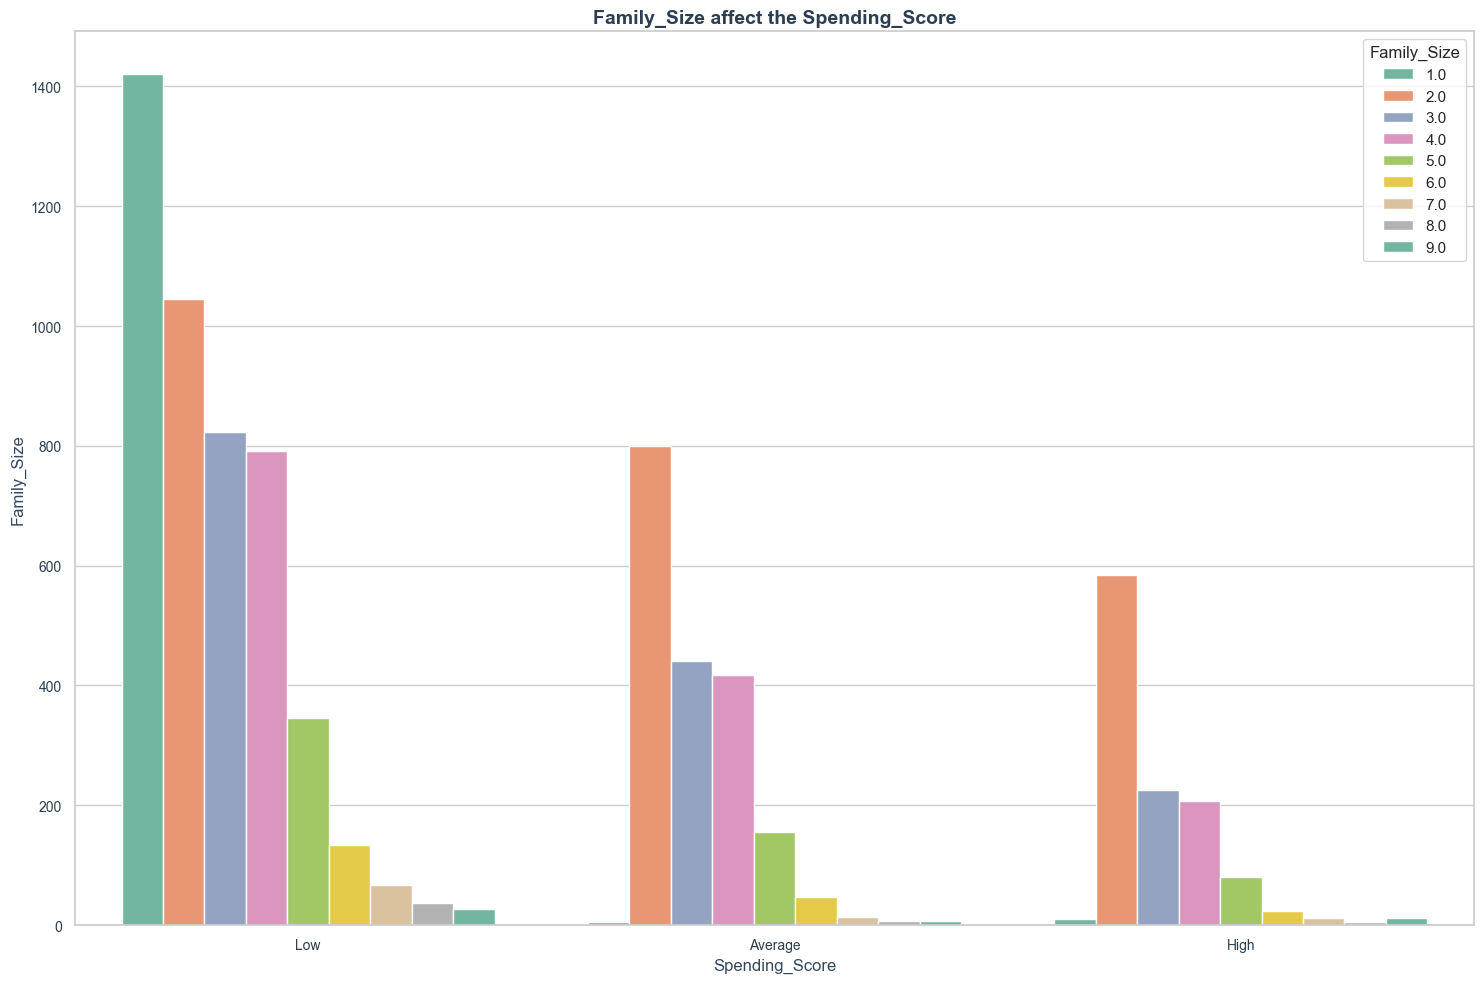

In [128]:

plt.figure(figsize=(15, 10), dpi=100)
sns.set_theme(style="whitegrid")

sns.countplot(data=data, x='Spending_Score', hue='Family_Size', palette="Set2")
plt.title('Family_Size affect the Spending_Score', fontsize=14, fontweight='bold', color="#2c3e50")
plt.ylabel('Family_Size', fontsize=12, color="#34495e")
plt.xlabel('Spending_Score', fontsize=12, color="#34495e")
plt.xticks(fontsize=10, color="#2c3e50")
plt.yticks(fontsize=10, color="#2c3e50")

plt.tight_layout()
plt.show()



+What features are most correlated with Spending_Score?

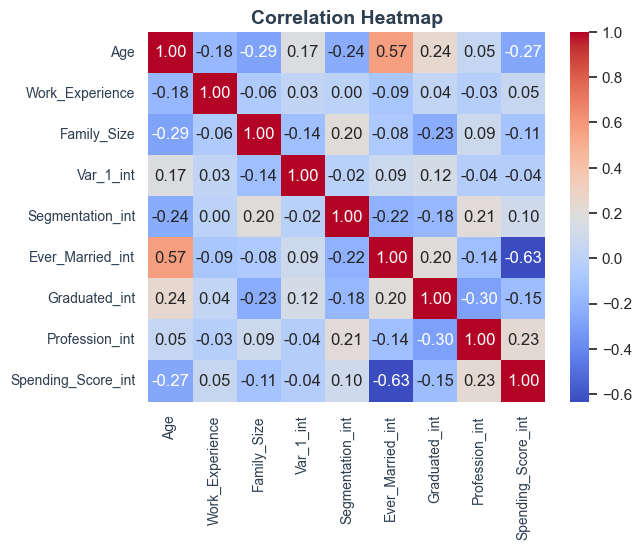

In [129]:
features = ['Age', 'Work_Experience', 'Family_Size', 'Var_1_int', 'Segmentation_int', 'Ever_Married_int', 'Graduated_int', 'Profession_int', 'Spending_Score_int']
corr = data[features].corr() 

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold', color="#2c3e50")
plt.xticks(fontsize=10, color="#2c3e50")
plt.yticks(fontsize=10, color="#2c3e50")
plt.show()

Profession have the most correation with spending score

+ Which segment (e.g., Segmentation) has the highest average Spending_Score?


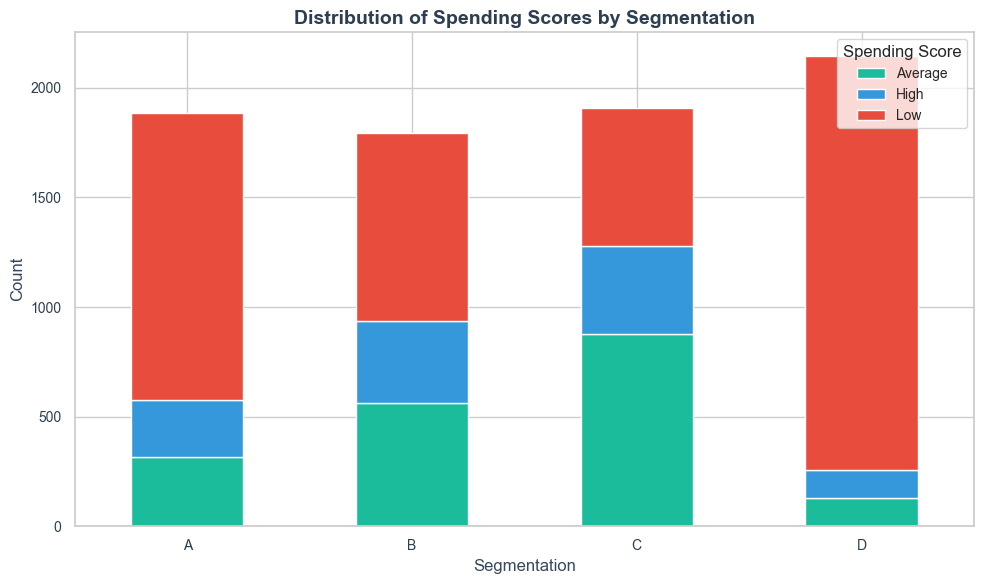

In [130]:


# Count values of Spending_Score grouped by Segmentation
spending_counts = data.groupby("Segmentation")["Spending_Score"].value_counts().unstack()

# Plotting
spending_counts.plot(kind='bar', figsize=(10, 6), stacked=True, color=["#1abc9c", "#3498db", "#e74c3c"])

# Adding titles and labels
plt.title('Distribution of Spending Scores by Segmentation', fontsize=14, fontweight='bold', color="#2c3e50")
plt.ylabel('Count', fontsize=12, color="#34495e")
plt.xlabel('Segmentation', fontsize=12, color="#34495e")
plt.xticks(rotation=0, fontsize=10, color="#2c3e50")
plt.yticks(fontsize=10, color="#2c3e50")
plt.legend(title="Spending Score", fontsize=10)

plt.tight_layout()
plt.show()


+ What are the main characteristics (e.g., Age, Profession, Gender) of each segment?

In [131]:
# Descriptive statistics for numerical features
numerical_features = ['Age', 'Work_Experience', 'Family_Size']  # Example numerical columns
numerical_stats = data.groupby("Segmentation")[numerical_features].describe()

# Proportion of categorical features
categorical_features = ['Profession', 'Gender', 'Ever_Married']
categorical_stats = data.groupby("Segmentation")[categorical_features].value_counts(normalize=True)


In [132]:
numerical_stats

Age                                                      \
               count       mean        std   min   25%   50%   75%   max   
Segmentation                                                               
A             1887.0  44.846847  16.434044  18.0  33.0  41.0  52.0  89.0   
B             1794.0  48.205128  14.870036  18.0  37.0  46.0  58.0  89.0   
C             1909.0  49.306967  14.556946  18.0  39.0  49.0  59.0  89.0   
D             2146.0  33.280522  15.564545  18.0  22.0  29.0  37.0  89.0   

             Work_Experience            ...            Family_Size            \
                       count      mean  ...  75%   max       count      mean   
Segmentation                            ...                                    
A                     1887.0  2.719661  ...  4.0  14.0      1887.0  2.423423   
B                     1794.0  2.238016  ...  3.0  14.0      1794.0  2.690078   
C                     1909.0  2.136721  ...  2.0  14.0      1909.0  2.957046   
D                     2146.0  2.766542  ...  5.0  14.0      2146.0  3.223672   

                                                 
                   std  min  25%  50%  75%  max  
Segmentation                                     
A             1.465887  1.0  1.0  2.0  3.0  9.0  
B             1.405448  1.0  2.0  2.0  4.0  9.0  
C             1.366428  1.0  2.0  3.0  4.0  9.0  
D             1.659421  1.0  2.0  3.0  4.0  9.0  

[4 rows x 24 columns]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17724\2927355276.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Segmentation', y='Age', palette="Set2")


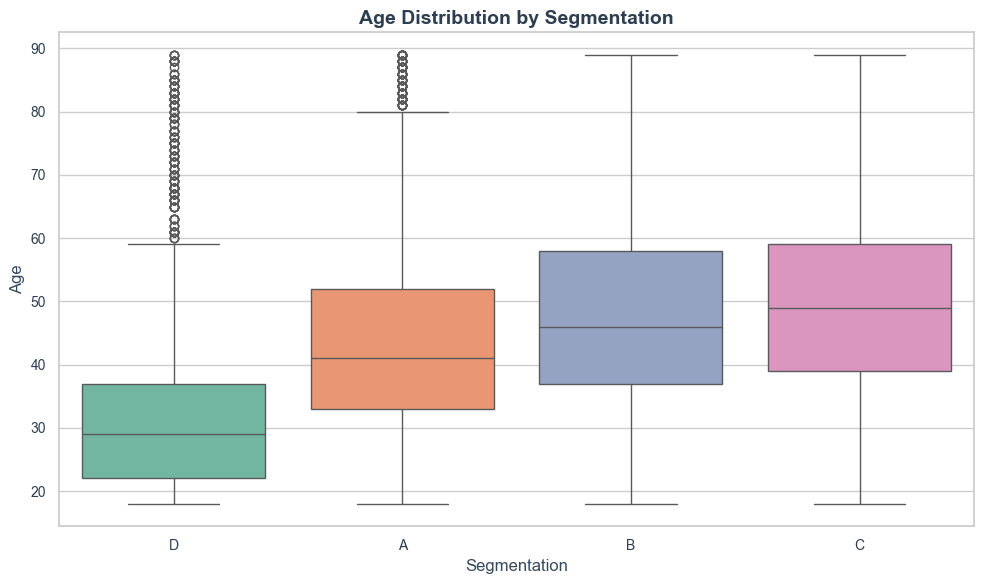

In [133]:
plt.figure(figsize=(10, 6), dpi=100)
sns.boxplot(data=data, x='Segmentation', y='Age', palette="Set2")

plt.title('Age Distribution by Segmentation', fontsize=14, fontweight='bold', color="#2c3e50")
plt.ylabel('Age', fontsize=12, color="#34495e")
plt.xlabel('Segmentation', fontsize=12, color="#34495e")
plt.xticks(fontsize=10, color="#2c3e50")
plt.yticks(fontsize=10, color="#2c3e50")
plt.tight_layout()
plt.show()


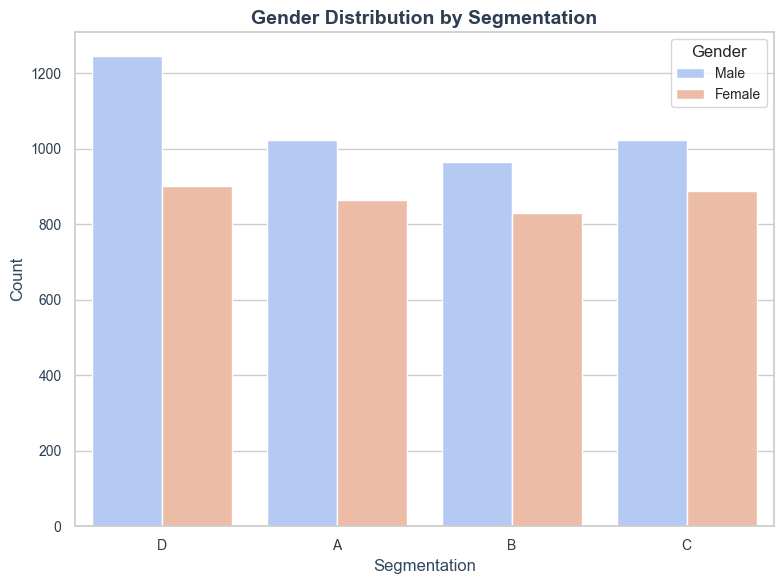

In [134]:
plt.figure(figsize=(8, 6), dpi=100)
sns.countplot(data=data, x='Segmentation', hue='Gender', palette="coolwarm")

plt.title('Gender Distribution by Segmentation', fontsize=14, fontweight='bold', color="#2c3e50")
plt.ylabel('Count', fontsize=12, color="#34495e")
plt.xlabel('Segmentation', fontsize=12, color="#34495e")
plt.xticks(fontsize=10, color="#2c3e50")
plt.yticks(fontsize=10, color="#2c3e50")
plt.legend(title="Gender", fontsize=10)
plt.tight_layout()
plt.show()


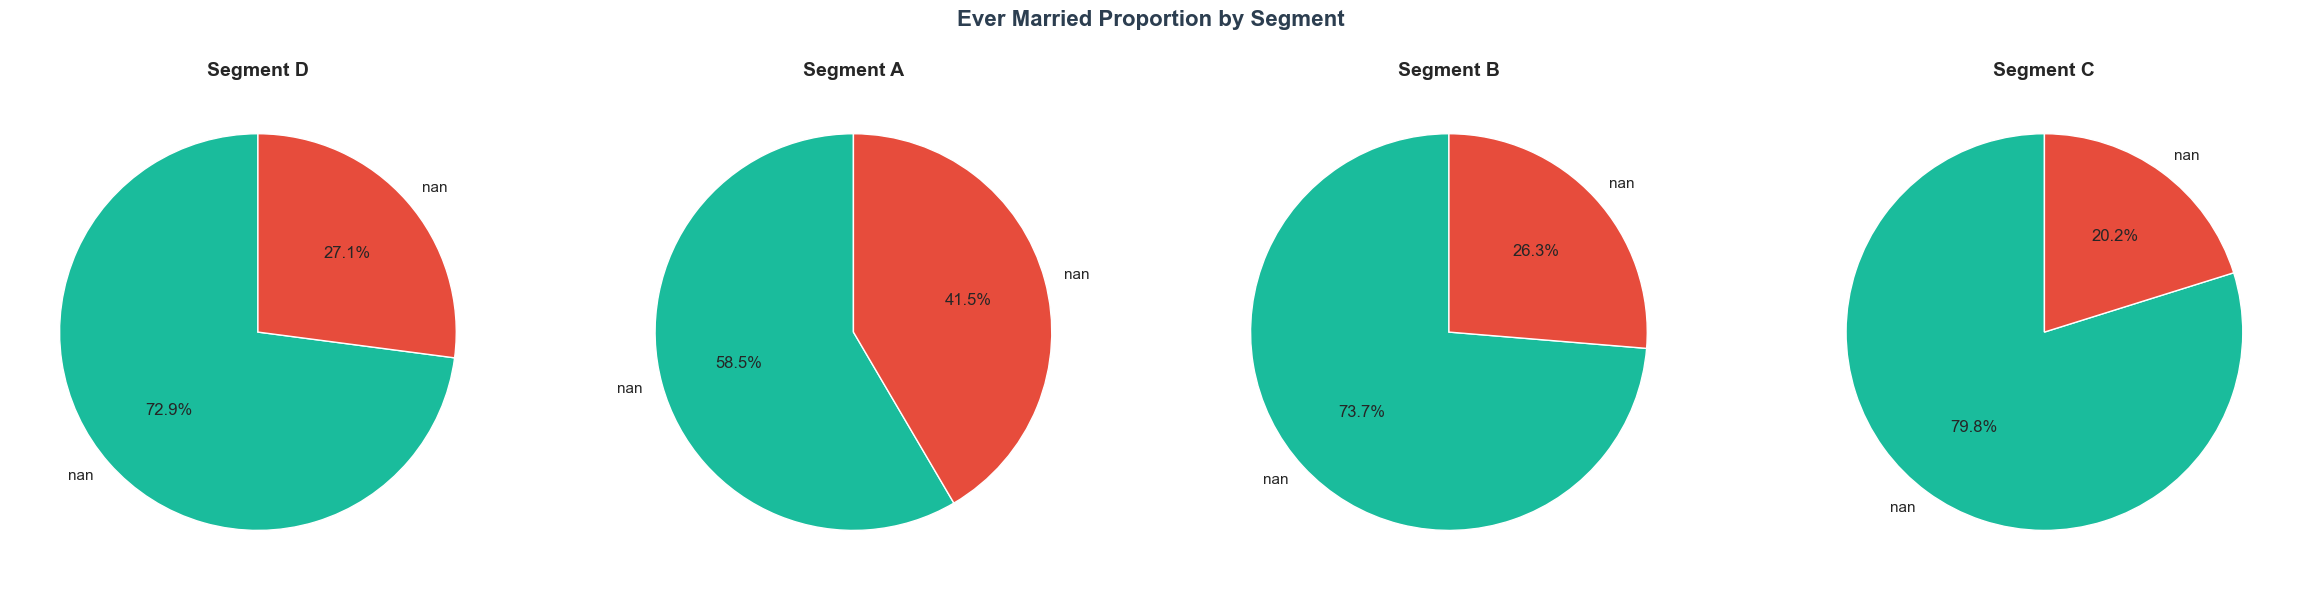

In [135]:
import matplotlib.pyplot as plt

# Determine the number of unique segments
segments = data['Segmentation'].unique()
num_segments = len(segments)

# Create subplots with appropriate dimensions
fig, axes = plt.subplots(1, num_segments, figsize=(6 * num_segments, 6), dpi=100)

# Plot each segment's pie chart
for i, segment in enumerate(segments):
    segment_data = data[data['Segmentation'] == segment]
    counts = segment_data['Ever_Married'].value_counts()
    
    # Plot on the corresponding subplot
    axes[i].pie(
        counts,
        labels=counts.index.map({1: 'Yes', 0: 'No'}),
        autopct='%1.1f%%',
        colors=['#1abc9c', '#e74c3c'],
        startangle=90
    )
    axes[i].set_title(f'Segment {segment}', fontsize=14, fontweight='bold')

# Overall title for the figure
plt.suptitle('Ever Married Proportion by Segment', fontsize=16, fontweight='bold', color="#2c3e50")
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the suptitle
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17724\2178813702.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_work_experience, x='Segmentation', y='Work_Experience', palette="Set2")


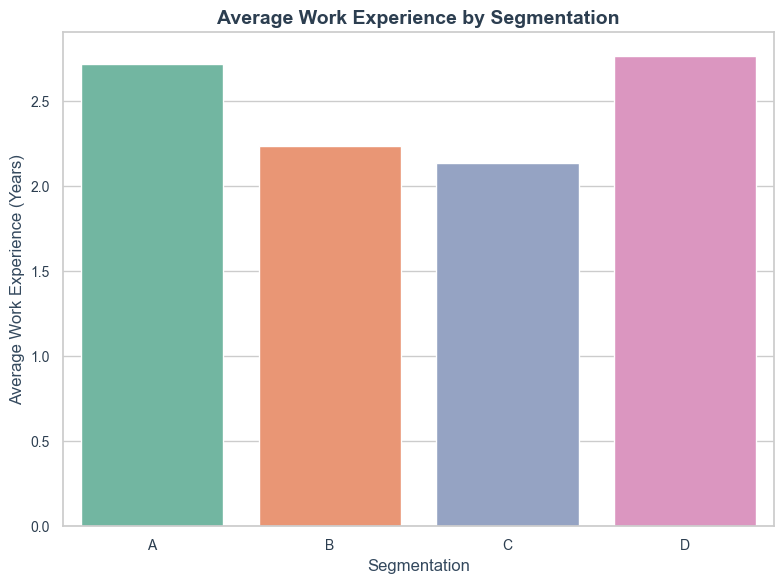

In [136]:
# Calculate average work experience for each segment
avg_work_experience = data.groupby('Segmentation')['Work_Experience'].mean().reset_index()

plt.figure(figsize=(8, 6), dpi=100)
sns.barplot(data=avg_work_experience, x='Segmentation', y='Work_Experience', palette="Set2")

plt.title('Average Work Experience by Segmentation', fontsize=14, fontweight='bold', color="#2c3e50")
plt.ylabel('Average Work Experience (Years)', fontsize=12, color="#34495e")
plt.xlabel('Segmentation', fontsize=12, color="#34495e")
plt.xticks(fontsize=10, color="#2c3e50")
plt.yticks(fontsize=10, color="#2c3e50")
plt.tight_layout()
plt.show()


+ Check Outlier and clean it.

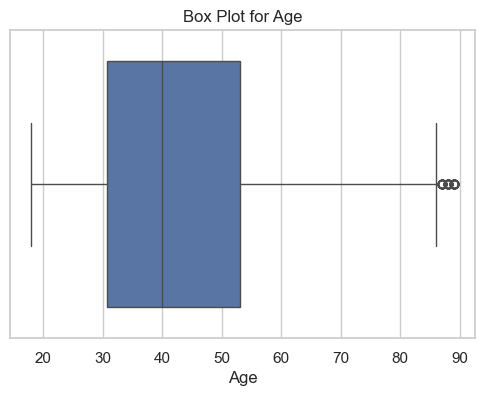

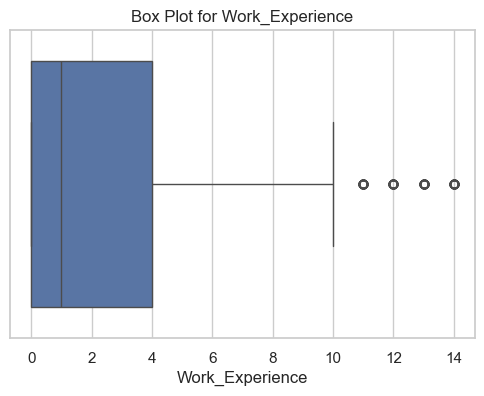

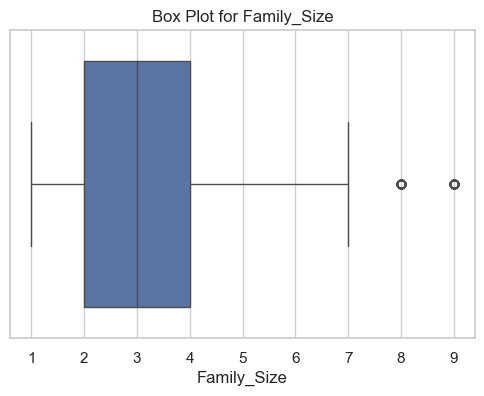

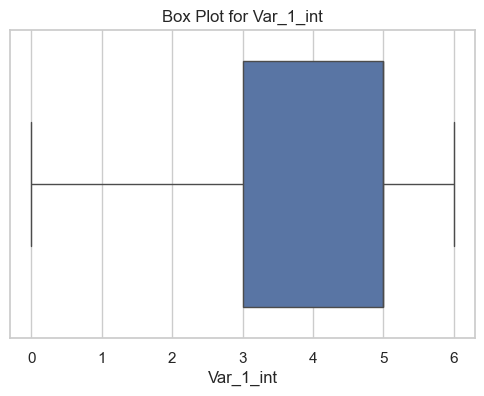

In [137]:
# Check outlier by graph
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['Age', 'Work_Experience', 'Family_Size', 'Var_1_int',]  # Example numerical columns
# Example: Box plot for all numerical features
for column in numerical_features:  # Replace with your numerical feature list
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot for {column}')
    plt.show()


In [138]:
# Check how many outlier there
Q1 = data[numerical_features].quantile(0.25)
Q3 = data[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers = ((data[numerical_features] < (Q1 - 1.5 * IQR)) | 
            (data[numerical_features] > (Q3 + 1.5 * IQR)))
print("Outliers detected:\n", outliers.sum())


Outliers detected:
 Age                 96
Work_Experience    183
Family_Size         91
Var_1_int            0
dtype: int64


use Cap Outliers: Winsorize the data by capping extreme values to a maximum/minimum threshold.

In [139]:
for col in numerical_features:
    data[col] = data[col].clip(lower=data[col].quantile(0.05), upper=data[col].quantile(0.95))


In [140]:
# Detect outliers
outliers = ((data[numerical_features] < (Q1 - 1.5 * IQR)) | 
            (data[numerical_features] > (Q3 + 1.5 * IQR)))
print("Outliers detected:\n", outliers.sum())


Outliers detected:
 Age                0
Work_Experience    0
Family_Size        0
Var_1_int          0
dtype: int64


# Modeling training and evaluation

+ Data processing

In [141]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Range,Ever_Married_int,Graduated_int,Profession_int,Spending_Score_int,Var_1_int,Segmentation_int,Gender_int
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,20-30,0,0,5,2,3,3,1
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A,30-40,1,1,2,0,3,0,0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,60-70,1,1,2,2,5,1,0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,60-70,1,1,7,1,5,1,1
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,5.0,Cat_6,A,30-40,1,1,3,1,5,0,0


In [142]:
# Scale some numerical features
from sklearn.preprocessing import StandardScaler
data['Age_scaled'] = StandardScaler().fit_transform(data[['Age']])
data['Work_Experience_scaled'] = StandardScaler().fit_transform(data[['Work_Experience']])
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,...,Age_Range,Ever_Married_int,Graduated_int,Profession_int,Spending_Score_int,Var_1_int,Segmentation_int,Gender_int,Age_scaled,Work_Experience_scaled
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,...,20-30,0,0,5,2,3,3,1,-1.344106,-0.457543
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,...,30-40,1,1,2,0,3,0,0,-0.334511,-0.457543
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,...,60-70,1,1,2,2,5,1,0,1.495379,-0.457543
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,...,60-70,1,1,7,1,5,1,1,1.495379,-0.787079
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,5.0,Cat_6,...,30-40,1,1,3,1,5,0,0,-0.208312,-0.457543


In [143]:
X = data.drop(columns=['ID','Gender','Ever_Married','Graduated','Profession','Spending_Score','Segmentation','Var_1','Age_Range','Segmentation_int','Age_scaled','Work_Experience_scaled'])
y = data['Segmentation_int']

Segmentation_int
3    2146
2    1909
0    1887
1    1794
Name: count, dtype: int64


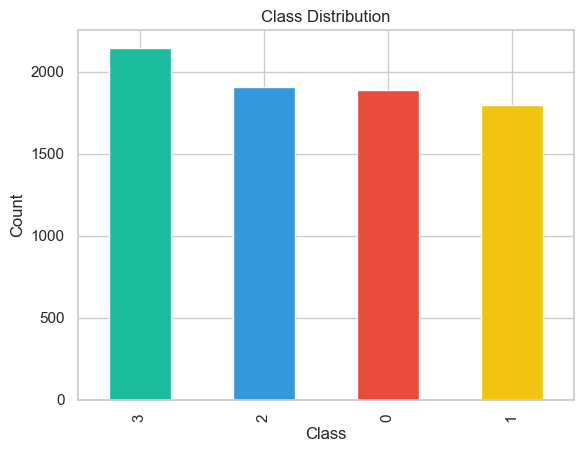

In [144]:
class_counts = y.value_counts()  # For pandas Series `y`
print(class_counts)

# Visualize the class distribution
class_counts.plot(kind='bar', color=['#1abc9c', '#3498db', '#e74c3c', '#f1c40f'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


+ Train the model using Cross Validation

In [145]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

LogisticRegression

In [146]:
from sklearn.linear_model import LogisticRegression
# Initialize the Logistic Regression model
logic = LogisticRegression(multi_class='multinomial', solver='newton-cg')

# Define the scoring metrics you want to evaluate
scoring = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']

# Perform cross-validation with multiple scoring metrics
cv_results = cross_validate(logic, X, y, cv=5, scoring=scoring)

# Print out the results for each metric
print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f} ± {cv_results['test_accuracy'].std():.4f}")
print(f"F1-Score: {cv_results['test_f1_weighted'].mean():.4f} ± {cv_results['test_f1_weighted'].std():.4f}")
print(f"Precision: {cv_results['test_precision_weighted'].mean():.4f} ± {cv_results['test_precision_weighted'].std():.4f}")
print(f"Recall: {cv_results['test_recall_weighted'].mean():.4f} ± {cv_results['test_recall_weighted'].std():.4f}")


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1

Accuracy: 0.4969 ± 0.0127
F1-Score: 0.4717 ± 0.0082
Precision: 0.4732 ± 0.0118
Recall: 0.4969 ± 0.0127


In [147]:
# Scaling model

X_scaled = data.drop(columns=['ID','Gender','Ever_Married','Graduated','Profession','Spending_Score','Segmentation','Var_1','Age_Range','Segmentation_int','Age','Work_Experience'])	

from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logic = LogisticRegression(multi_class='multinomial', solver='newton-cg')

# Define the scoring metrics you want to evaluate
scoring = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']

# Perform cross-validation with multiple scoring metrics
cv_results = cross_validate(logic, X_scaled, y, cv=5, scoring=scoring)

# Print out the results for each metric
print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f} ± {cv_results['test_accuracy'].std():.4f}")
print(f"F1-Score: {cv_results['test_f1_weighted'].mean():.4f} ± {cv_results['test_f1_weighted'].std():.4f}")
print(f"Precision: {cv_results['test_precision_weighted'].mean():.4f} ± {cv_results['test_precision_weighted'].std():.4f}")
print(f"Recall: {cv_results['test_recall_weighted'].mean():.4f} ± {cv_results['test_recall_weighted'].std():.4f}")



C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1

Accuracy: 0.4969 ± 0.0127
F1-Score: 0.4717 ± 0.0082
Precision: 0.4732 ± 0.0118
Recall: 0.4969 ± 0.0127


SVM (Support Vector Machine)

In [148]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear', decision_function_shape='ovr', random_state=42)

# Define the scoring metrics you want to evaluate
scoring = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']

# Perform cross-validation with multiple scoring metrics
cv_results = cross_validate(svm_model, X, y, cv=5, scoring=scoring)

# Print out the results for each metric
print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f} ± {cv_results['test_accuracy'].std():.4f}")
print(f"F1-Score: {cv_results['test_f1_weighted'].mean():.4f} ± {cv_results['test_f1_weighted'].std():.4f}")
print(f"Precision: {cv_results['test_precision_weighted'].mean():.4f} ± {cv_results['test_precision_weighted'].std():.4f}")
print(f"Recall: {cv_results['test_recall_weighted'].mean():.4f} ± {cv_results['test_recall_weighted'].std():.4f}")


Accuracy: 0.4952 ± 0.0150
F1-Score: 0.4652 ± 0.0119
Precision: 0.4746 ± 0.0171
Recall: 0.4952 ± 0.0150


In [149]:
# Scale 
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear', decision_function_shape='ovr', random_state=42)

# Define the scoring metrics you want to evaluate
scoring = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']

# Perform cross-validation with multiple scoring metrics
cv_results = cross_validate(svm_model, X_scaled, y, cv=5, scoring=scoring)

# Print out the results for each metric
print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f} ± {cv_results['test_accuracy'].std():.4f}")
print(f"F1-Score: {cv_results['test_f1_weighted'].mean():.4f} ± {cv_results['test_f1_weighted'].std():.4f}")
print(f"Precision: {cv_results['test_precision_weighted'].mean():.4f} ± {cv_results['test_precision_weighted'].std():.4f}")
print(f"Recall: {cv_results['test_recall_weighted'].mean():.4f} ± {cv_results['test_recall_weighted'].std():.4f}")


Accuracy: 0.4964 ± 0.0150
F1-Score: 0.4628 ± 0.0097
Precision: 0.4753 ± 0.0178
Recall: 0.4964 ± 0.0150


In [150]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='rbf', decision_function_shape='ovr', random_state=42)

# Define the scoring metrics you want to evaluate
scoring = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']

# Perform cross-validation with multiple scoring metrics
cv_results = cross_validate(svm_model, X, y, cv=5, scoring=scoring)

# Print out the results for each metric
print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f} ± {cv_results['test_accuracy'].std():.4f}")
print(f"F1-Score: {cv_results['test_f1_weighted'].mean():.4f} ± {cv_results['test_f1_weighted'].std():.4f}")
print(f"Precision: {cv_results['test_precision_weighted'].mean():.4f} ± {cv_results['test_precision_weighted'].std():.4f}")
print(f"Recall: {cv_results['test_recall_weighted'].mean():.4f} ± {cv_results['test_recall_weighted'].std():.4f}")


Accuracy: 0.4807 ± 0.0109
F1-Score: 0.4603 ± 0.0098
Precision: 0.4609 ± 0.0106
Recall: 0.4807 ± 0.0109


In [151]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='poly', decision_function_shape='ovr', random_state=42)

# Define the scoring metrics you want to evaluate
scoring = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']

# Perform cross-validation with multiple scoring metrics
cv_results = cross_validate(svm_model, X, y, cv=5, scoring=scoring)

# Print out the results for each metric
print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f} ± {cv_results['test_accuracy'].std():.4f}")
print(f"F1-Score: {cv_results['test_f1_weighted'].mean():.4f} ± {cv_results['test_f1_weighted'].std():.4f}")
print(f"Precision: {cv_results['test_precision_weighted'].mean():.4f} ± {cv_results['test_precision_weighted'].std():.4f}")
print(f"Recall: {cv_results['test_recall_weighted'].mean():.4f} ± {cv_results['test_recall_weighted'].std():.4f}")


Accuracy: 0.4833 ± 0.0080
F1-Score: 0.4491 ± 0.0041
Precision: 0.4620 ± 0.0089
Recall: 0.4833 ± 0.0080


In [152]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='sigmoid', decision_function_shape='ovr', random_state=42)

# Define the scoring metrics you want to evaluate
scoring = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']

# Perform cross-validation with multiple scoring metrics
cv_results = cross_validate(svm_model, X, y, cv=5, scoring=scoring)

# Print out the results for each metric
print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f} ± {cv_results['test_accuracy'].std():.4f}")
print(f"F1-Score: {cv_results['test_f1_weighted'].mean():.4f} ± {cv_results['test_f1_weighted'].std():.4f}")
print(f"Precision: {cv_results['test_precision_weighted'].mean():.4f} ± {cv_results['test_precision_weighted'].std():.4f}")
print(f"Recall: {cv_results['test_recall_weighted'].mean():.4f} ± {cv_results['test_recall_weighted'].std():.4f}")


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

Accuracy: 0.2823 ± 0.0154
F1-Score: 0.2591 ± 0.0160
Precision: 0.3607 ± 0.0045
Recall: 0.2823 ± 0.0154


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


DessionTreeClassifier

In [153]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

# Define the scoring metrics you want to evaluate
scoring = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']

# Perform cross-validation with multiple scoring metrics
cv_results = cross_validate(dt_model, X, y, cv=5, scoring=scoring)

# Print out the results for each metric
print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f} ± {cv_results['test_accuracy'].std():.4f}")
print(f"F1-Score: {cv_results['test_f1_weighted'].mean():.4f} ± {cv_results['test_f1_weighted'].std():.4f}")
print(f"Precision: {cv_results['test_precision_weighted'].mean():.4f} ± {cv_results['test_precision_weighted'].std():.4f}")
print(f"Recall: {cv_results['test_recall_weighted'].mean():.4f} ± {cv_results['test_recall_weighted'].std():.4f}")



Accuracy: 0.4311 ± 0.0129
F1-Score: 0.4329 ± 0.0126
Precision: 0.4356 ± 0.0127
Recall: 0.4311 ± 0.0129


Random Forest

In [154]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

# Define the scoring metrics you want to evaluate
scoring = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']

# Perform cross-validation with multiple scoring metrics
cv_results = cross_validate(rf_model, X, y, cv=5, scoring=scoring)

# Print out the results for each metric
print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f} ± {cv_results['test_accuracy'].std():.4f}")
print(f"F1-Score: {cv_results['test_f1_weighted'].mean():.4f} ± {cv_results['test_f1_weighted'].std():.4f}")
print(f"Precision: {cv_results['test_precision_weighted'].mean():.4f} ± {cv_results['test_precision_weighted'].std():.4f}")
print(f"Recall: {cv_results['test_recall_weighted'].mean():.4f} ± {cv_results['test_recall_weighted'].std():.4f}")



Accuracy: 0.4791 ± 0.0110
F1-Score: 0.4764 ± 0.0099
Precision: 0.4752 ± 0.0096
Recall: 0.4791 ± 0.0110


Gradient Boosting Machines (GBM)

In [155]:
from sklearn.ensemble import GradientBoostingClassifier

Gb_model = GradientBoostingClassifier(random_state=42)

# Define the scoring metrics you want to evaluate
scoring = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']

# Perform cross-validation with multiple scoring metrics
cv_results = cross_validate(Gb_model, X, y, cv=5, scoring=scoring)

# Print out the results for each metric
print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f} ± {cv_results['test_accuracy'].std():.4f}")
print(f"F1-Score: {cv_results['test_f1_weighted'].mean():.4f} ± {cv_results['test_f1_weighted'].std():.4f}")
print(f"Precision: {cv_results['test_precision_weighted'].mean():.4f} ± {cv_results['test_precision_weighted'].std():.4f}")
print(f"Recall: {cv_results['test_recall_weighted'].mean():.4f} ± {cv_results['test_recall_weighted'].std():.4f}")



Accuracy: 0.5392 ± 0.0126
F1-Score: 0.5331 ± 0.0106
Precision: 0.5320 ± 0.0112
Recall: 0.5392 ± 0.0126


XGBoost

In [156]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100,random_state=42)

# Define the scoring metrics you want to evaluate
scoring = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']

# Perform cross-validation with multiple scoring metrics
cv_results = cross_validate(xgb_model, X, y, cv=5, scoring=scoring)

# Print out the results for each metric
print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f} ± {cv_results['test_accuracy'].std():.4f}")
print(f"F1-Score: {cv_results['test_f1_weighted'].mean():.4f} ± {cv_results['test_f1_weighted'].std():.4f}")
print(f"Precision: {cv_results['test_precision_weighted'].mean():.4f} ± {cv_results['test_precision_weighted'].std():.4f}")
print(f"Recall: {cv_results['test_recall_weighted'].mean():.4f} ± {cv_results['test_recall_weighted'].std():.4f}")



Accuracy: 0.5068 ± 0.0119
F1-Score: 0.5030 ± 0.0098
Precision: 0.5016 ± 0.0097
Recall: 0.5068 ± 0.0119


LGBoost

In [157]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(n_estimators=100,random_state=42)

# Define the scoring metrics you want to evaluate
scoring = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']

# Perform cross-validation with multiple scoring metrics
cv_results = cross_validate(lgb_model, X, y, cv=5, scoring=scoring)

# Print out the results for each metric
print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f} ± {cv_results['test_accuracy'].std():.4f}")
print(f"F1-Score: {cv_results['test_f1_weighted'].mean():.4f} ± {cv_results['test_f1_weighted'].std():.4f}")
print(f"Precision: {cv_results['test_precision_weighted'].mean():.4f} ± {cv_results['test_precision_weighted'].std():.4f}")
print(f"Recall: {cv_results['test_recall_weighted'].mean():.4f} ± {cv_results['test_recall_weighted'].std():.4f}")



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 6188, number of used features: 9
[LightGBM] [Info] Start training from score -1.410502
[LightGBM] [Info] Start training from score -1.461447
[LightGBM] [Info] Start training from score -1.399307
[LightGBM] [Info] Start training from score -1.282616
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 6189, number of used features: 9
[LightGBM] [Info] Start training from score -1.411326
[LightGBM] [Info] Start training

+ After use CV we can see that the best model is GBClassifier with the highest accuracy, F1-Score, Precision, and Recall. So we will use this model to train our dataset.

In [158]:
# split the data set into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [159]:
# Fit the model
Gb_model.fit(X_train, y_train)

# Predict the target value with unseen data
y_pred = Gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 0.5394
F1-Score: 0.5357
Precision: 0.5355
Recall: 0.5394


In [160]:
# summary the evaluationq
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.43      0.48      0.45       362
           1       0.43      0.35      0.39       353
           2       0.61      0.58      0.60       406
           3       0.64      0.71      0.67       427

    accuracy                           0.54      1548
   macro avg       0.53      0.53      0.53      1548
weighted avg       0.54      0.54      0.54      1548



              Feature  Importance
0                 Age    0.432012
5      Profession_int    0.220210
6  Spending_Score_int    0.154607
2         Family_Size    0.050576
4       Graduated_int    0.042828
3    Ever_Married_int    0.031830
7           Var_1_int    0.028504
1     Work_Experience    0.024925
8          Gender_int    0.014509


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17724\1490518464.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")


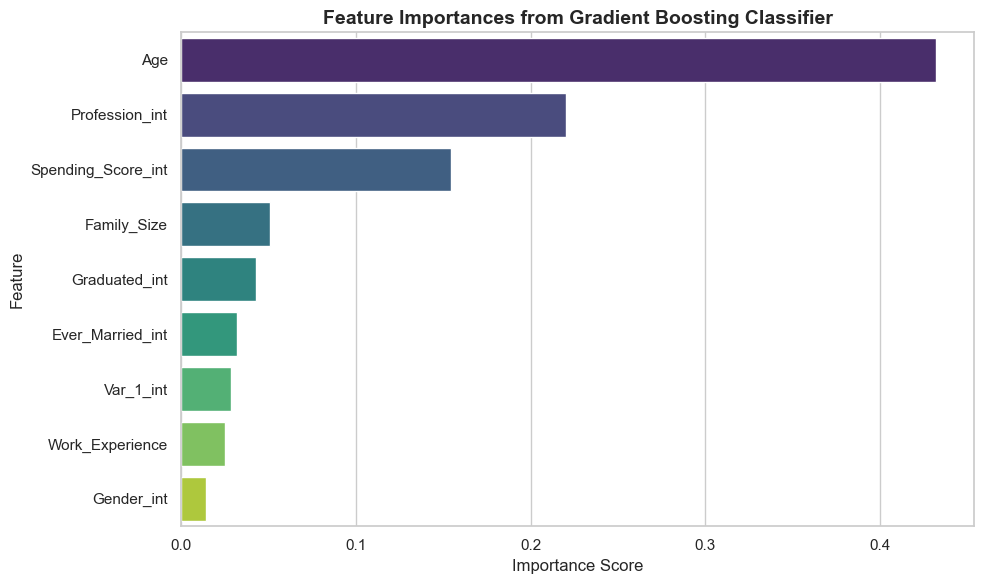

In [161]:
import pandas as pd

# Assuming you have trained your model: Gb_model
# and you have your feature names in a variable: feature_names

# Extract feature importances
importances = Gb_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importance
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6), dpi=100)
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")
plt.title('Feature Importances from Gradient Boosting Classifier', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


In [162]:
# try to take the top 5 most important feature base on the model

from sklearn.feature_selection import RFE

model = GradientBoostingClassifier()
rfe = RFE(model, n_features_to_select=5)  # Keep the top 5 features
fit = rfe.fit(X_train, y_train)

# Check selected features
print("Selected Features:", fit.support_)
print("Feature Ranking:", fit.ranking_)


Selected Features: [ True False  True False  True  True  True False False]
Feature Ranking: [1 4 1 2 1 1 1 3 5]


In [163]:
important_features_X = X.loc[:, fit.support_]
X_train, X_test, y_train, y_test = train_test_split(important_features_X, y, test_size=0.2, random_state=42)

In [164]:
important_features_X

,Age,Family_Size,Graduated_int,Profession_int,Spending_Score_int
0,22,4.0,0,5,2
1,38,3.0,1,2,0
2,67,1.0,1,2,2
3,67,2.0,1,7,1
4,40,5.0,1,3,1
...,...,...,...,...,...
8062,41,5.0,1,0,1
8064,35,4.0,0,4,2
8065,33,1.0,1,5,2
8066,27,4.0,1,5,2


Train the new model with the selected features

In [165]:
model.fit(X_train, y_train)

# Predict the target value with unseen data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.5323
F1-Score: 0.5253
Precision: 0.5268
Recall: 0.5323


In [166]:
# summary the evaluationq
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.42      0.49      0.45       362
           1       0.42      0.30      0.35       353
           2       0.61      0.58      0.59       406
           3       0.62      0.72      0.67       427

    accuracy                           0.53      1548
   macro avg       0.52      0.52      0.52      1548
weighted avg       0.53      0.53      0.53      1548



In [167]:
X.head()

,Age,Work_Experience,Family_Size,Ever_Married_int,Graduated_int,Profession_int,Spending_Score_int,Var_1_int,Gender_int
0,22,1.0,4.0,0,0,5,2,3,1
1,38,1.0,3.0,1,1,2,0,3,0
2,67,1.0,1.0,1,1,2,2,5,0
3,67,0.0,2.0,1,1,7,1,5,1
4,40,1.0,5.0,1,1,3,1,5,0


+ I try most all the feature one by one and it's seem that the model is not good enough to predict the segmentation. only the all feature can give the best result. so let's do a tuning for the model.

# Hyperparameter tuning with GridSearchCV for GradientBoostingClassifier model 

In [168]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.6, 0.8, 1.0],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
# }

# # Instantiate the model
# gbc = GradientBoostingClassifier(random_state=42)

# # Set up GridSearchCV
# grid = GridSearchCV(
#     estimator=gbc,
#     param_grid=param_grid,
#     scoring='accuracy',  # or other metrics like 'f1_weighted'
#     cv=5,  # 5-fold cross-validation 
#     verbose=3  # Print progress
# )

# # Fit the grid search
# grid.fit(X_train, y_train)

# # Output the best parameters and score
# print("Best Parameters:", grid.best_params_)
# print("Best Cross-Validation Accuracy:", grid.best_score_)




Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50, 'subsample': 0.6}
Best Cross-Validation Accuracy: 0.531674160869162

In [169]:
# # Retrieve the best estimator
# best_gbc = grid.best_estimator_
# l

# # Predict on the test set
# y_pred = best_gbc.predict(X_test)

# # Evaluate using various metrics
# from sklearn.metrics import classification_report, confusion_matrix

# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))


In [170]:
# [[180  53  44  85]
#  [ 98 115 103  37]
#  [ 49  75 232  50]
#  [ 96  26   5 300]]
#               precision    recall  f1-score   support

#            0       0.43      0.50      0.46       362
#            1       0.43      0.33      0.37       353
#            2       0.60      0.57      0.59       406
#            3       0.64      0.70      0.67       427

#     accuracy                           0.53      1548
#    macro avg       0.52      0.52      0.52      1548
# weighted avg       0.53      0.53      0.53      1548

In [171]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform, randint

# # Define the parameter distribution
# param_dist = {
#     'n_estimators': randint(50, 300),
#     'learning_rate': uniform(0.01, 0.2),
#     'max_depth': randint(2, 10),
#     'subsample': uniform(0.5, 0.9),
#     'min_samples_split': randint(2, 20),
#     'min_samples_leaf': randint(1, 10)
# }

# # Randomized search
# random_search = RandomizedSearchCV(
#     estimator=GradientBoostingClassifier(random_state=42),
#     param_distributions=param_dist,
#     scoring='accuracy',
#     n_iter=100,  # Number of parameter combinations to try
#     cv=5,
#     random_state=42,
#     verbose=2,
# )

# random_search.fit(X_train, y_train)

# print("Best Parameters:", random_search.best_params_)
# print("Best Cross-Validation Accuracy:", random_search.best_score_)


+ After tuning the model, the accuracy is 0.53 which is not good enough. The model is underfitting. and the model is not good enough to predict the segmentation of the customer. let's use the model before tuning to predict the segmentation of the customer as our final model.

In [172]:
import pickle

# Save encoders to files
for column, encoder in label_encoders.items():
    with open(f"{column}_encoder.pkl", "wb") as file:
        pickle.dump(encoder, file)


In [173]:
import joblib

joblib.dump(Gb_model, 'final_model.pkl')


['final_model.pkl']

# Use the model on the real data

In [174]:
test_dt = pd.read_csv('test.csv')
test_dt.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [175]:
test_dt.isna().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [176]:
test_dt.dropna(inplace=True)

Load encoders from files to encode the test data

In [177]:
# Load encoders from files
loaded_encoders = {}
categorical_columns = ['Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Gender']

for column in categorical_columns:
    with open(f"{column}_encoder.pkl", "rb") as file:
        loaded_encoders[column] = pickle.load(file)


In [178]:
# encode the categorical columns
for column in categorical_columns:
    test_dt[f"{column}_int"] = loaded_encoders[column].transform(test_dt[column])


In [179]:
X_test = test_dt[["Age",	"Work_Experience",	"Family_Size",	"Ever_Married_int",	"Graduated_int",	"Profession_int",	"Spending_Score_int",	"Var_1_int",	"Gender_int"]]

In [180]:
# Load the model
loaded_model = joblib.load('final_model.pkl')


In [181]:
loaded_model

GradientBoostingClassifier(random_state=42)

In [182]:
# Assume `X_test` is your prepared test feature set
y_pred = Gb_model.predict(X_test)

# If the model supports probabilities
y_prob = Gb_model.predict_proba(X_test)
y_prob

array([[0.49111144, 0.29768687, 0.03585943, 0.17534225],
       [0.20340785, 0.34600787, 0.28315758, 0.16742669],
       [0.2386565 , 0.29368886, 0.37768395, 0.08997069],
       ...,
       [0.51473752, 0.24341908, 0.07410253, 0.16774086],
       [0.16870488, 0.49047072, 0.24718878, 0.09363562],
       [0.2401221 , 0.1029446 , 0.1551276 , 0.5018057 ]])

In [184]:
#Put the predict data to original dataset one.
test_dt['Segmentation'] = y_pred
test_dt.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Ever_Married_int,Graduated_int,Profession_int,Spending_Score_int,Var_1_int,Gender_int,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,1,1,2,2,5,0,0
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,1,1,5,0,5,1,1
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,1,0,4,1,5,1,2
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4,1,1,1,1,3,1,1
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6,1,1,1,2,5,1,1


In [185]:
# Save the submission file
test_dt.to_csv('submission.csv', index=False)